In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import arviz as az

# Bayesian Analysis with Python
By Osvaldo Martin

## Contents
1. Thinking Probablistically: basic concepts of Bayes
2. Programming Probablistically: Intros pyMC3 and Arviz
3. Linear regression
4. Generalising linear models
5. Model comparison: compare select and average models, WAIC, LOO and Bayes factor
6. Mixture models: add flexibility by mixing similar distributions to create complex ones. Intro to non-parametric models with Dirichlet process
7. Gaussian processes
8. Inference engines: methods for numerically approximating posteriors, diagnosing reliabiity of posterior
9. where next?

# Chapter 1: Thinking Probablistically

## Statistical Modelling

### Statistical Methods
There are two in data analysis:
* Exploratory Data Analysis (EDA): Numerical summaries of data (descriptive statistics) and visual inspection (graphing)
* Inferential statistics: Making statements beyong current data, predictions, explaining observations

Here we focus on IS methods, then using EDA to summarise, interpret, check, communicate results 

### Data
Generating data is a __stochastic process__, there is uncertainty involved, because of limitations of measurement precision. With technical sampling this can be technical, i.e. our machines/measurements generate noise or can't measure precisely.

### Bayesian modelling
Three steps:
1. design our crude model by combining __probability distributions__ like building blocks
2. Use Bayes' theorem to add data and generate the outcome (called _conditioning the model on data_)
3. Critisise the model by checking it. 

## Probability and Uncertainty
### Interpreting probailities
A __probability__ is a measure that quantifies the uncertainty of a statement, in the interval \[0,1\]. 

In a Bayesian framework it is a relative/subjective concept, it depends on what WE know. 'What is the probability there is life on Mars?' is a valid question in Bayes, as opposed to an 'objective' framework, which would say the probability that there is life on Mars is either 1 or 0 because there either is or there isn't.

Probablity is an extention of logic. Where logic is the science of the certain, things are either true or false, these conditions are a special case of probability; true and false are equivalent to the probability of something being 1 or 0 respectively, and probability also includes everything in-between these two extremes. __Cromwell's rule__ states that you should limit the assignation of probabilities of 1 or 0 to logically True or False statements.

(There is an assymetry here: it is easier to show the probablity of something is 1 than 0. You can't prove a negative.)

### Defining probabilities - mathematical properties
#### The Product Rule
$$p(A,B) = p(A \mid B)p(B)$$

$p(A,B)$ is the joint probability.

$p(A \mid B)$ is the conditional probability.

### Probability Distributions
An object that describes how likely different events are, with events restricted to a set of possible events in the sample space.

A common conceptualisation: Data is generated from some _true_ probability distribution with unknown parameters. __Inference__ is the process of trying to figure out that true probability distribution and its parameters from a sample (the _Dataset_), by creating and improving a model approximating the true probability distribution.

If a variable $X$ can be described using a PD, we call $X$ a __random variable__.

$x$ would indicate an instance of that random variable. It can be a vector and contain many values, $x = (x_1, x_2, \dots , x_n)$.

Using Python's scipy.stats package we can define a random variable $X$ by specifying its distribution, then get an instance $x$ by sampling random variates (`rvs`) from it. Each time we sample we will get a different, random, result, because the sampling is a stochastic process. How likely we are to get a particular value for $x$ is determined by the probability distribution.

In [2]:
μ = 0
σ = 1
X = stats.norm(μ, σ)
x = X.rvs(3)
x

array([-0.33463563, -0.8184051 ,  1.13439107])

The concept of inference is that if we generate random variates enough times, we can build up a picture of how likely each result is, and infer the true probability distribution of $X$

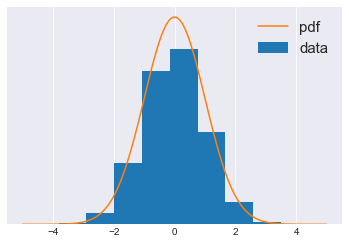

In [3]:
x = X.rvs(1000000)
x1 = np.linspace(-5,5,100)

plt.hist(x, label='data')
plt.yticks([])
plt.plot(x1, X.pdf(x1)*1000000, label='pdf')
plt.legend(fontsize = 15)
plt.show()

You denote that a variable is distributed normally with parameters $\mu,\sigma$ as follows:

$$X \sim N(\mu,\sigma)$$

A saying something is normally distributed is equivalent to saying that the probability of randomly selecting a value of $x$ is dictated by the formula:

$$p(x \mid \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{\left(x-\mu\right)^2}{2\sigma^2}}$$

This is called the __probability density function__, pdf, and each type of distribution is defined by one of these. (the equivalent for a discrete distribution is the probability mass function, or pmf)

Let's explore the pdfs of Normal distributions with different parameters visually

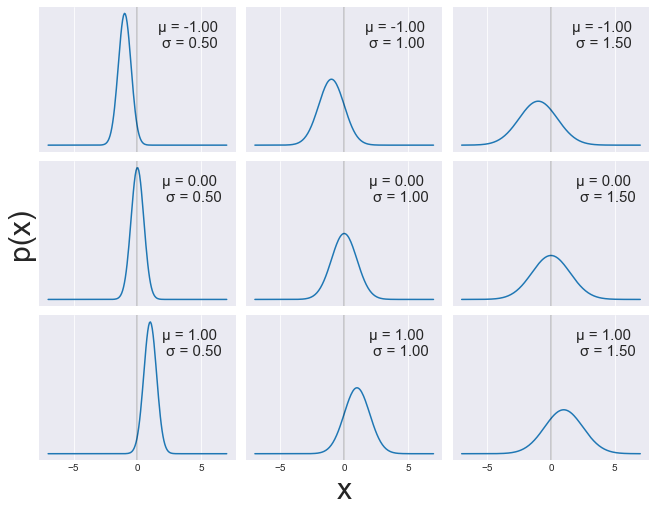

In [4]:
μ_params = [-1,0,1]
σ_params = [0.5,1,1.5]
x = np.linspace(-7,7,200)
_, ax = plt.subplots(len(μ_params), len(σ_params), 
                    sharex=True, sharey=True,
                    figsize=(9,7), constrained_layout=True)

for i in range(3):
    for j in range(3):
        μ = μ_params[i]
        σ = σ_params[j]
        y = stats.norm(μ, σ).pdf(x)
        ax[i,j].plot(x,y)
        ax[i,j].plot([], label="μ = {:3.2f} \n σ = {:3.2f}".format(μ,σ), alpha=0)
        ax[i,j].legend(loc=1, fontsize=15)
        ax[i,j].axvline(0, color='black', alpha = .2)
ax[2,1].set_xlabel('x', fontsize=30)
ax[1,0].set_ylabel('p(x)', fontsize=30)
ax[1,0].set_yticks([])

plt.show()

## Bayes theorem and statistical inference (to fill)

## Single parameter inference (the coin flip problem)
To summarise where we are

> Probabilities are used to measure the uncertainty we have about parameters, and Bayes' theorem is the mechanism to correctly update those probabilities in light of new data, hopefully reducing our uncertainty.

Lets do a simple worked example: flipping a coin

### Conceptualising the model
Our situation is that we have a coin and we want to determine whether it is fair. Or more specifically we want to infer from data what the (currently unknown) probability is that the coin will land heads.

To represent this probability we assign it a random variable $\theta$. So we will need to define a probability distribution for $\theta$. 

We will represent as $Y$ the random variable of the number of heads obtained from N tosses of the coin.

### Choosing the likelihood
The classic choice for representing coin tossing is the Binomial distribution. 

A couple of assumptions are implicit in this distribution: Two outcomes are possible, heads or tails, and all tosses are independent of any other.

$$Y \sim Bin(N, \theta)$$

$$p(y \mid \theta, N) = \frac{N!}{y!(N-y)!}\theta^y(1-\theta)^{N-y}$$

Lets get the shape of this distribution by using the pmf for a few fixed values of N and $\theta$

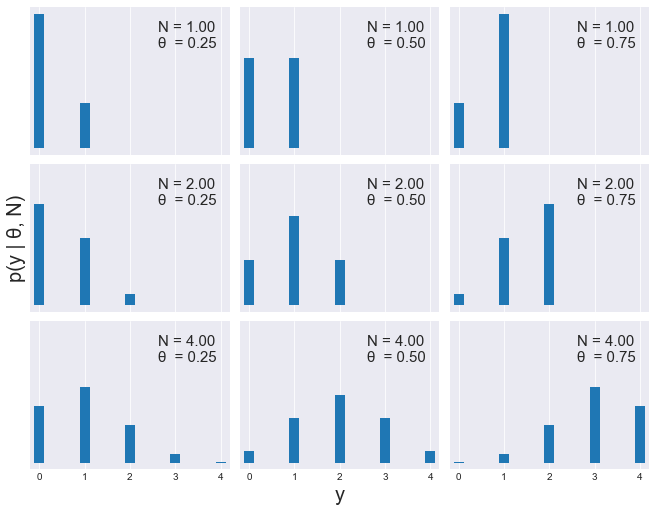

In [5]:
N_params = [1,2,4]
θ_params = [0.25,0.5,0.75]

x = np.arange(0, max(N_params)+1)
fig,ax = plt.subplots(len(N_params), len(θ_params),
                     sharex = True, sharey = True,
                     figsize=(9,7), constrained_layout=True)

for i in range(len(N_params)):
    for j in range(len(θ_params)):
        N = N_params[i]
        θ = θ_params[j]
        
        y = stats.binom(n=N, p=θ).pmf(x)
        
        ax[i,j].vlines(x, 0, y, lw=10, color = 'C0') # syntax here is vline(x, ymin, ymax)
        ax[i,j].plot([], label="N = {:3.2f}\nθ  = {:3.2f}".format(N,θ), alpha=0)
        ax[i,j].legend(fontsize=15)
        
ax[2,1].set_xlabel('y', fontsize=20)
ax[1,0].set_ylabel('p(y | θ, N)', fontsize=20)
ax[0,0].set_xticks(x)
ax[0,0].set_yticks([])
plt.show()

### Choosing the prior
We're going to choose an instance of the __beta__ distribution, with picked $\alpha$ and $\beta$, as our prior.

The Beta is defined by the pdf

$$p(\theta) = \frac{\Gamma\left(\alpha+\beta\right)}{\Gamma\left(\alpha\right)\Gamma\left(\beta\right)} \theta^{\alpha-1} (1-\theta)^{\beta-1}$$

Again lets explore this graphically.

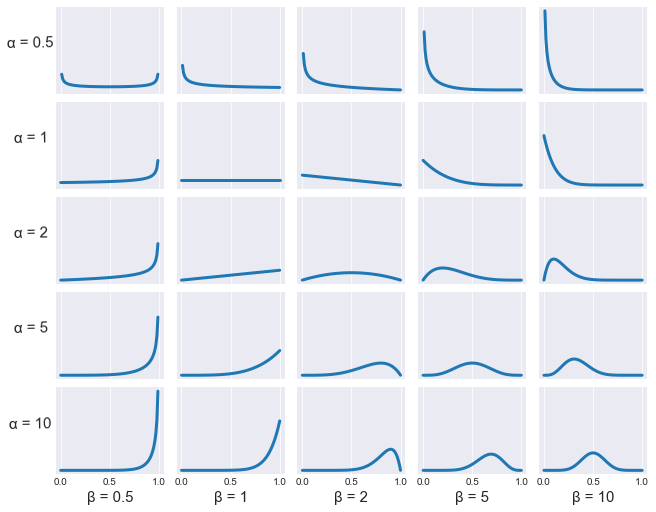

In [6]:
params = [0.5,1,2,5,10]
x = np.linspace(0,1,100)
fig, ax = plt.subplots(len(params), len(params),
                      sharex=True, sharey=True,
                      figsize=(9,7), constrained_layout=True)

for i in range(5):
    for j in range(5):
        α = params[i]
        β = params[j]
        y = stats.beta(α, β).pdf(x)
        
        ax[i,j].plot(x,y, lw=3, color='C0')
        ax[i,0].set_ylabel('α = '+str(params[i]), fontsize=15, rotation=1, labelpad=25)
        ax[4,j].set_xlabel('β = '+str(params[j]), fontsize=15)
        
ax[0,0].set_yticks([])
ax[0,0].set_xticks([0,0.5,1])
plt.show()

Beta is a very versatile distribution. It can take a lot of shapes, including the u-like, uniforms, normal-ish. It is restricted to / valid for inputs between 1 and 0.

The Beta is the conjugate prior for the binomial, meaning our posterior will also be a Beta. This is important when assessing analytically, when only a few combinations of distributions are easily computable, but less important when we get to computing numerically (a major advantage of the new approach).

### Computing and plotting the posterior
Specifically when you combine a Beta and Binomial as we have, you get a posterior

$$\theta \mid y \sim \text{Beta}\left(\alpha_{prior}+y, \beta_{prior}+N-y\right)$$ 

lets plot the posterior under three possible priors parameterised with ($\alpha$, $\beta$), (1,1), (10,10), (1,5), and with 0 trials (i.e. the pure prior), and 1,2,3,4,8,16,32,50 and 100 trials.

Let's set the 'true' theta to 0.35, i.e. the coin is tails biased - we wouldn't know that in real life obviously

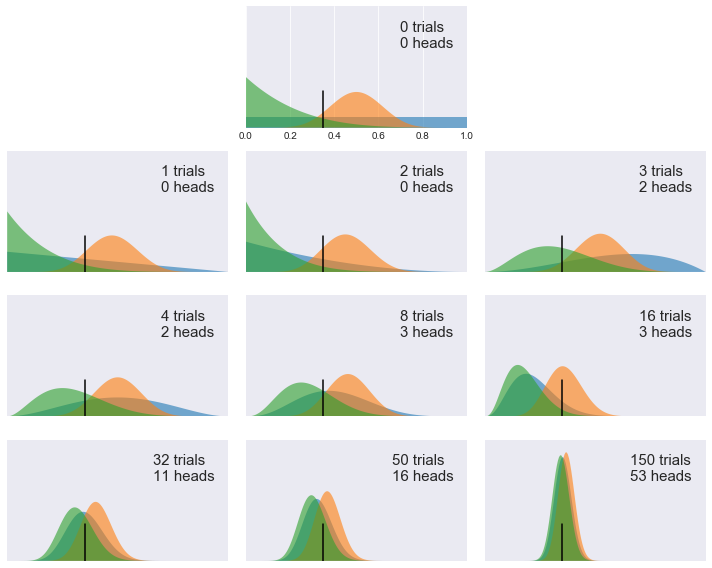

In [7]:
true_θ = 0.35
Beta_params = [(1,1),(10,10),(1,5)]
N_params = [0,1,2,3,4,8,16,32,50,150]
y_data = []
for N in N_params: 
    y_data.append(stats.binom(p=true_θ, n=N).rvs())

x = np.linspace(0.0,1.0,200)

plt.figure(figsize=(10,8))
for idx, N in enumerate(N_params):
    if idx == 0:
        plt.subplot(4,3,2)
    else:
        plt.subplot(4,3,idx+3)
        plt.xticks([])
    y = y_data[idx]
    for α, β in Beta_params:
        θ = stats.beta(a = α + y, b = β + N - y)
        plt.fill_between(x, θ.pdf(x), alpha = 0.6)
    plt.axvline(true_θ, ymax=0.3, color='k')
    plt.xlim(0,1)
    plt.ylim(0,12)
    plt.yticks([])
    plt.plot([], label='%d trials\n%d heads'%(N, y), alpha=0)
    plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

A few observations on this:
the first chart, with 0 trials, represents out priors: uniform (a=1,b=1) in blue, tails waited (1,5) in green, and gaussian-like centered on 0.5 (10,10) in orange.

the black vertical line is the mean of the 'true' probability, 0.35, which in reality we wouldn't know

The posterior results are represented by distributions which give probabilities about where we think the true mean might be. The most probably value is the peak (mode) of the distirbution.

the spread of each posterior represents how uncertain we are. A very 'tight' distribution means we are getting quite certain. Notice that the larger the number of trials, the tighter the distirbutions, the more we 'hone in' on the true value, which makes intuitive sense.

Priors have an effective sample size. The prior with a=10, b=10 (ESS=20) has a bigger effective sample size than a=1,b=1 (ESS=2). The consequences of this can be seen when we have a fairly small number of trials. When you have three trials (sample size of data is 3) this has a big impact on the posterior in the case of the (1,1) prior, but the (10,10) prior barely moves. Eventually though, if you collected enough data the prior, the weight of the data is going to overwhelm the prior, as we can see in the 150 trial result: all 3 posteriors are nearly the same (though the 10,10 prior is still distinguishable as separate)

the more 'extreme' values we get from our trials, the more that tends to narrow our spread. Compare the following 2 graphs, you can see the posterior you get when you get ALL heads from your trial results in a narrower spread than if you get half and half. The all heads result has more 'information' than the half and half

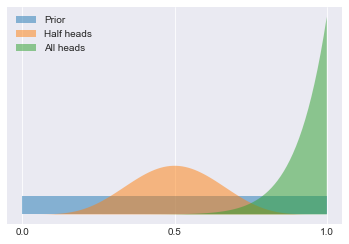

In [8]:
N = 10
y1 = 5
y2 = 10

x = np.linspace(0,1,100)
prior = stats.beta(a=1,b=1).pdf(x)
post1 = stats.beta(a=1+y1,b=1+N-y1).pdf(x)
post2 = stats.beta(a=1+y2,b=1+N-y2).pdf(x)
plt.fill_between(x, prior, alpha = 0.5, label='Prior')
plt.fill_between(x, post1, alpha = 0.5, label='Half heads')
plt.fill_between(x, post2, alpha = 0.5, label='All heads')
plt.legend(loc=2)
plt.yticks([])
plt.xticks([0,0.5,1])
plt.show()

Something not obvious from this presentation is the you get the same result if you create a posterior from data with 150 trials, as if you ran 50 trials, updated your prior, and then ran another 100 trials, plugging in the posterior from the first run as the prior of the second one. The posterior you come out with at the end of the day is the same in both cases (provided the data results are ultimately the same obviously).

This is useful because this iterative updating is something that happpens in real life all the time.

## Priors: Choosing them and why you should like them

## Communicating a Bayesian analysis
### Model notiation and visualisation
You can give the distributions we use to represent the data and prior. You can also represent this visually as a Kruschke diagram, or something similar with the package (can't recall what this is, plug it in when you can)

### Summarising the posterior
The posterior is the outcome, it's generally what we want to present. It contains all the info in aggregate from the model and the data, so presenting this is in effect a summary of the whole shebang.

Commonly you'll report on one or some of the mean, median, mode of the posterior, with some measure of spread (e.g. standard deviation for normals).

### Highest Posterior Density (HPD)
This is another common spread measure, a specific case of a __credible interval__. It is the shortest possible interval of the x axis of a distribution that contains x% of the probability density (you would call this is x% HPD. A common value is 95%, and arviz uses 94% by default.) 

A 95% HPD covering the interval $\theta=[2,5]$ allows you to make the statement 'we think the parameter $\theta$ is between 2 and 5, with a probability of 0.95'.

Note this is similar to, but subtly different from, the frequentist framework concept of confidence interval. Since in that framework, $\theta$ is a fixed value, with a CI you are effectively saying 'there is a 95% chance $\theta$ is in this interval'. With Bayes, we don't attached a fixed value to theta, or think there is a 'true' $\theta$. Instead we think in terms of a $\theta$ distribution, so we can make statements in terms of probability of a instance of a parameter being within a range.

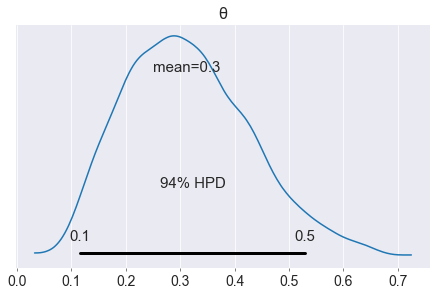

In [9]:
np.random.seed(1)
az.plot_posterior({'θ':stats.beta.rvs(5,11,size=1000)})
plt.show()

### Model validation: Posterior predictive checks
You can use posterior to generate predictions. Technically you use the __posterior predictive__ distribution. Mathematically the posterior predictive is defined as:

$$p(\tilde{y} \mid y) = \int p(\tilde{y} \mid \theta)p(\theta \mid y) d \theta$$

Computationally we approximate the integral as a 2 step process:
1. sample a value of $\theta$ from the posterior $p(\theta\mid y)$
2. Feed the value of $\theta$ to the likelihood, thus obtaining a data point $\tilde{y}$

The main use of these generated predictions (apart from actually making predictions) is to critisize our posterior, by comparing the generated data points with the actual data and comparing how similar they are. These are __posterior predictive checks__. If they are significant differences you may have made a modelling error, for example assigning a bad distribution to the data. Or if there are no 'errors', you can use the PPCs to understand the limits of your model: it models the mean well, say, but is thrown out by extreme values. This might be OK, or you might want to go back and amend your model.

## Summary - the Bayesian workflow
1. We assume there is a 'true' distribution for some phenomenon/variable that is unknown (and unknowable)
2. We obtain a sample from that distribution, by experiment, survey, observation, or simulation.
3. We build a probablistic model of the variable, with two components that we try to estimate: 
    * the likelihood - a model for the variable, specifying the type of distribution, but leaving the parameters of that distribution unknown
    * the prior - assigned distributions for each of the parameters contained in the likelihood.
4. We combine the prior and likelihood using Bayes' theorem, and get the posterior.
5. We generate from the posterior the posterior predictive distribution, and from the PPC we draw random samples, and compare the sample to our observed data, to see whether the model is good enough for whatever purpose we're using it for.
6. If not we use the insights from step 5 to iterate and improve the model.